In [1]:
%%capture
"""
------------------------------------------------------------------------------------------------------------------------
Code used to generste figures from the nested N-spheres experiment. This was taken from Alex's GitHub:
https://github.com/a-norcliffe/sonode/blob/master/experiments/nested-n-spheres/make_figure.py

There is code for both NODEs and ANODEs. I don't fully understand how it functions, but am sure I can revisit this if 
need be.
------------------------------------------------------------------------------------------------------------------------
"""

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc as rc
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
#node
ninner = 40
nouter = 80

film_data = np.load(  '/content/drive/MyDrive/colab_notebooks/NODE_Hessian/nested_spheres/figure_data'
                    + '/node_film_2d.npy')

a = len(film_data)
frames = []

for i in range(a):
    frames += [film_data[i][:ninner+nouter]]
    
intermediate = np.asarray(frames)

inner = []
outer = []

for i in range(a):
    inner += [intermediate[i][:ninner]]
    outer += [intermediate[i][ninner:]]
    
inner = np.asarray(inner)
outer = np.asarray(outer)


#make film image:

inner_pic = np.empty((ninner, a, 2))
outer_pic = np.empty((nouter, a, 2))

for i in range(ninner):
    for j in range(a):
        inner_pic[i][j] = inner[j][i]
           
for i in range(ninner):
    inner_pic_plot = np.transpose(inner_pic[i])
    plt.plot(inner_pic_plot[0], inner_pic_plot[1], color='#004488', linewidth=0.3)    
inner_start_frame = np.transpose(inner[0])
inner_end_frame = np.transpose(inner[len(inner)-1])
plt.scatter(inner_start_frame[0], inner_start_frame[1], color='#004488', s=15)
plt.scatter(inner_end_frame[0], inner_end_frame[1], color='#004488', s=15)


for i in range(nouter):
    for j in range(a):
        outer_pic[i][j] = outer[j][i]
        
for i in range(nouter):
    outer_pic_plot = np.transpose(outer_pic[i])
    plt.plot(outer_pic_plot[0], outer_pic_plot[1], color='#BB5566', linewidth=0.3)    
outer_start_frame = np.transpose(outer[0])
outer_end_frame = np.transpose(outer[len(inner)-1])
plt.scatter(outer_start_frame[0], outer_start_frame[1], color='#BB5566', s=15)
plt.scatter(outer_end_frame[0], outer_end_frame[1], color='#BB5566', s=15)
plt.xlabel('x')
plt.ylabel('y')
plt.title('NODE')
plt.show()

In [ ]:
print(film_data[0].shape)
print(film_data[0][119,0])
for i in range(30):
  for j in range(ninner):
    plt.scatter(film_data[i][j,0], film_data[i][j,1], color='Blue')
  for k in range(nouter):
    plt.scatter(film_data[i][k+ninner,0], film_data[i][k+ninner,1], color='Red')

  plt.title('Time: ' + str(i))
  plt.xlabel('x')
  plt.ylabel('y')
  plt.show()

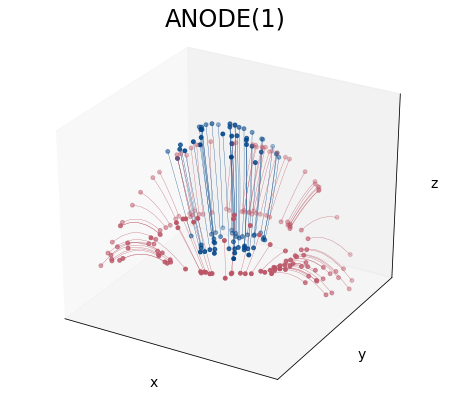

In [17]:
#anode

#Selects what frame to stop at, for representation
a = 6

ninner = 40
nouter = 80

film_data = np.load(  '/content/drive/MyDrive/colab_notebooks/NODE_Hessian/nested_spheres/figure_data'
                    + '/anode_film_(2+1)d.npy')

frames = []

for i in range(len(film_data)):
    frames += [film_data[i][:ninner+nouter]]
    
intermediate = np.asarray(frames)

inner = []
outer = []

for i in range(a):
    inner += [intermediate[i][:ninner]]
    outer += [intermediate[i][ninner:]]
    
inner = np.asarray(inner)
outer = np.asarray(outer)

#make film image:
fig = plt.figure(figsize=[25, 7])
fig.subplots_adjust(hspace=0., wspace=0.1)
ax2 = fig.add_subplot(132, projection='3d')

inner_pic = np.empty((ninner, a, 3))
outer_pic = np.empty((nouter, a, 3))

for i in range(ninner):
    for j in range(a):
        inner_pic[i][j] = inner[j][i]
           
for i in range(ninner):
    inner_pic_plot = np.transpose(inner_pic[i])
    ax2.plot(inner_pic_plot[0], inner_pic_plot[1], inner_pic_plot[2], color='#004488', linewidth=0.3)    
inner_start_frame = np.transpose(inner[0])
inner_end_frame = np.transpose(inner[len(inner)-1])
ax2.scatter(inner_start_frame[0], inner_start_frame[1], inner_start_frame[2], color='#004488', s=15)
ax2.scatter(inner_end_frame[0], inner_end_frame[1], inner_end_frame[2], color='#004488', s=15)


for i in range(nouter):
    for j in range(a):
        outer_pic[i][j] = outer[j][i]
        
for i in range(nouter):
    outer_pic_plot = np.transpose(outer_pic[i])
    plt.plot(outer_pic_plot[0], outer_pic_plot[1], outer_pic_plot[2], color='#BB5566', linewidth=0.3)    
outer_start_frame = np.transpose(outer[0])
outer_end_frame = np.transpose(outer[len(inner)-1])
ax2.scatter(outer_start_frame[0], outer_start_frame[1], outer_start_frame[2], color='#BB5566', s=15)
ax2.scatter(outer_end_frame[0], outer_end_frame[1], outer_end_frame[2], color='#BB5566', s=15)
ax2.grid(False)
#ax2.xaxis.pane.fill = False
#ax2.yaxis.pane.fill = False
#ax2.zaxis.pane.fill = False

ax2.set_xlabel('x', fontsize=14)
ax2.set_ylabel('y', fontsize=14)
ax2.set_zlabel('z', fontsize=14)
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_zticks([])
ax2.set_title('ANODE(1)', fontsize=24, pad=27)
plt.show()